In [1]:
# nasty import hack - this is a code smell, work out how to remove it
import sys
sys.path.append('../')
from simcoder.similarity import *

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# encoder_name = 'simclr2_r50_2x_sk1'
encoder_name = 'alexnet_fc6'

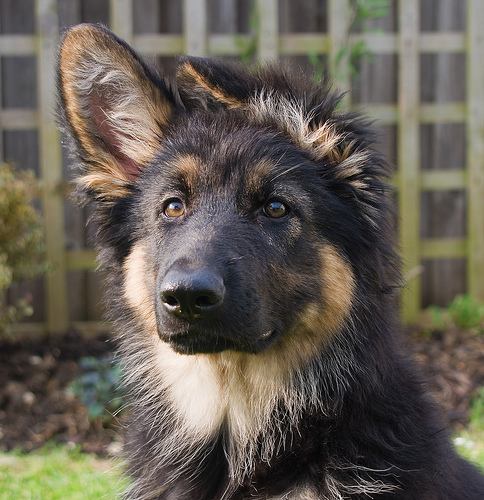

In [3]:
idx = 695165
query_img = get_mf_image(idx)
query_img

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


[261.3048  456.99088 501.31403 520.0343  545.21    561.045   590.59546
 605.08887 611.17505 616.0619  620.94464 621.1198  626.3015  626.483
 631.      632.26855 633.5015  635.9063  641.50836 642.4386  642.8636
 647.28107 647.45917 651.3999  655.23785 655.6558  656.80286 657.2185
 659.37366 661.58856 662.3757  663.0588  666.0893  667.8417  670.14996
 670.1961  671.0317  671.9058  673.5946  673.96515 674.2531  675.0532
 677.2536  678.1202  678.95776 680.8091  682.1427  684.8484  687.299
 687.56866 687.9683  688.1085  689.48157 690.0174  690.0967  691.3169
 691.8074  691.97003 693.1782  694.6389  694.7952  695.1147  696.3306
 697.0649  697.1026  698.2448  699.32544 699.3302  700.567   701.6769
 701.9083  702.6693  703.3781  703.85834 704.15857 704.5213  708.04175
 708.4465  708.5115  708.63885 708.95844 709.8516  709.9488  710.1221
 710.20874 710.53656 710.5985  711.4304  711.47327 712.6443  713.1471
 713.1635  714.09033 714.3201  715.04736 715.3853  716.16235 716.2256
 716.3223  717.055 

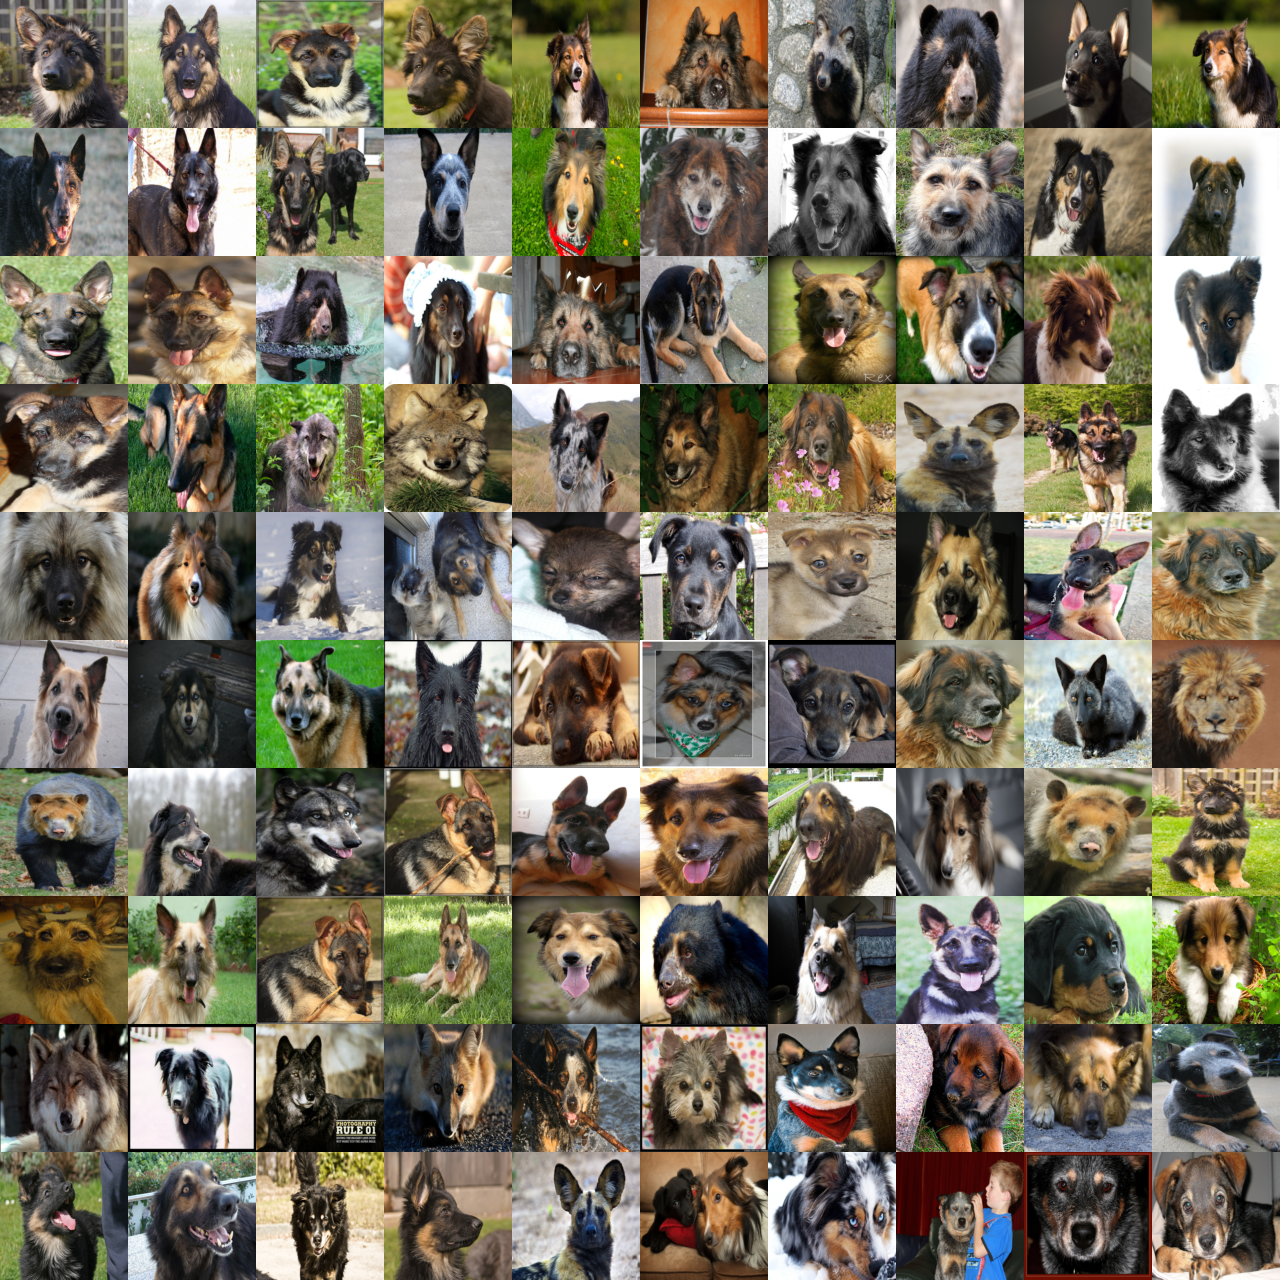

In [4]:
get_similar_mf(query_img, encoder_name, 128)

In [5]:
encoded_img = encode(query_img, encoder_name)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [6]:
mf_encodings = load_mf_encodings(Path("/output", f"mf_{encoder_name}"))
dog_enc = mf_encodings[idx]

In [13]:
print(encoded_img.squeeze().shape, dog_enc.shape)
print(encoded_img.squeeze())
print(dog_enc)

(4096,) (4096,)
[-12.616198   -3.9163857  11.650952  ... -13.518658    6.880506
 -23.61205  ]
[-13.133022    1.0920205   7.230098  ... -15.38875     2.9534726
 -21.358282 ]


In [8]:
def get_similar_mf_cheat(
    query_image_idx: int, encoder_name: str, img_size: int, 
) -> Image.Image:
    mf_encodings = load_mf_encodings(Path("/output", f"mf_{encoder_name}"))
    features = mf_encodings[query_image_idx]
    distances = euclid(features, mf_encodings)
    print(np.sort(distances)[:100])
    sorted_indices = np.argsort(distances)
    top_ten_indices = sorted_indices[:100]
    print(top_ten_indices)
    return make_mf_image_grid(top_ten_indices, 10, 10, img_size, img_size)

[  0.      400.91245 439.08957 462.1872  499.8275  511.89883 514.97565
 547.76074 551.0972  553.26215 562.147   564.65857 567.217   568.558
 571.1728  577.46686 582.0875  586.6513  587.32574 590.17737 593.57935
 593.67    594.124   595.2439  595.60284 595.6237  596.1697  596.9334
 599.00244 602.4889  603.0178  604.8132  606.7032  607.5379  607.84576
 610.07635 610.7362  611.12006 612.69635 613.51117 614.7668  616.73926
 616.78375 616.9505  618.7639  619.32965 622.3372  622.3632  622.9066
 623.37103 624.2738  625.6174  627.6621  627.90283 628.0944  629.3024
 629.7572  631.7782  632.20154 634.4155  635.1995  635.31335 636.84686
 638.21906 638.4281  640.06494 640.2913  640.57513 641.0063  642.68304
 642.97455 643.18097 643.3851  644.36206 644.84296 644.99274 645.20667
 645.35504 645.63165 647.8492  649.37665 649.5863  649.6653  649.82336
 650.203   650.78253 650.9364  651.0564  651.13873 651.3773  651.42365
 651.4785  652.0324  652.3097  652.3921  652.3987  654.4828  654.6749
 655.2698  6

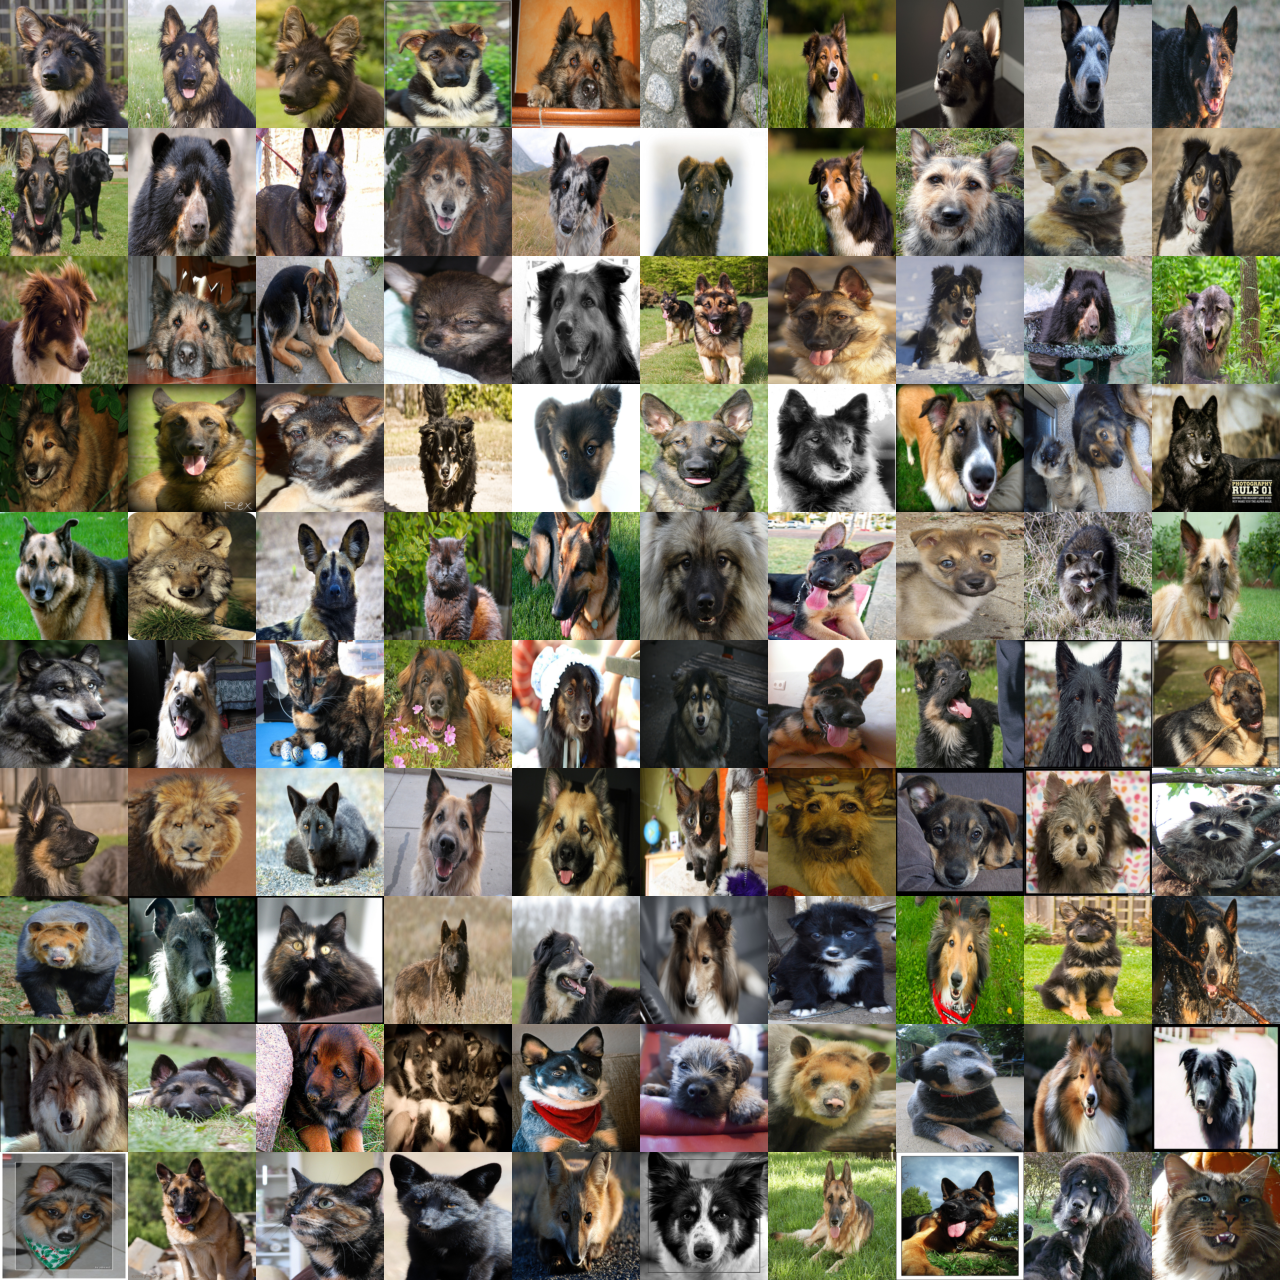

In [9]:
get_similar_mf_cheat(idx, encoder_name, 128)